In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


# Get the raw CSV data
url = 'https://raw.githubusercontent.com/sarwansingh/Python/29f0bcefc04d2fb262ad7f5075270b363dc68f2e/ClassExamples/data/spam.csv'  # Modified URL to point to raw data
response = requests.get(url)

# Read the CSV data from the response content
from io import StringIO  # Import StringIO to handle string as a file
df = pd.read_csv(StringIO(response.text))

# Now you can work with the DataFrame 'df'
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
df.groupby('v1').size()

,0
v1,
ham,4825
spam,747


In [ ]:
df.shape

(5572, 5)

 *Data cleaning,*
*EDA,*
*Text preprocessing,*
*Model building,*
*Evaluation,*
*improvement,*
*Website,*
*deployment*

# 1.Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [ ]:
df.sample(5)

,v1,v2
3652,ham,It has issues right now. Ill fix for her by to...
3664,ham,Ha... U jus ate honey ar? So sweet...
3854,spam,Free msg: Single? Find a partner in your area!...
38,ham,Anything lor... U decide...
2184,ham,I know a few people I can hit up and fuck to t...


In [ ]:
#rename the column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4427,ham,Aiyar dun disturb u liao... Thk u have lots 2 ...
4257,ham,I am late. I will be there at
763,ham,Nothing but we jus tot u would ask cos u ba gu...
2844,ham,Will be out of class in a few hours. Sorry
5270,ham,Did u fix the teeth?if not do it asap.ok take ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#find the missing value
df.isnull().sum()

,0
target,0
text,0


In [ ]:
#check duplicates values
df.duplicated().sum()

np.int64(403)

In [ ]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

# EDA(Exploratory Data Analysis)

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


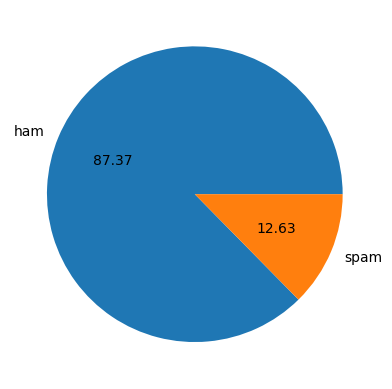

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

data is unbalanced

In [ ]:
#installing to find character,words and sentences in data
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt_tab')

# Now you can proceed with your code
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [ ]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [ ]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

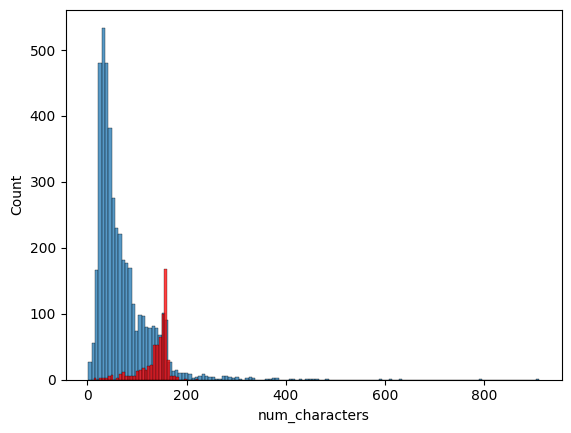

In [ ]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

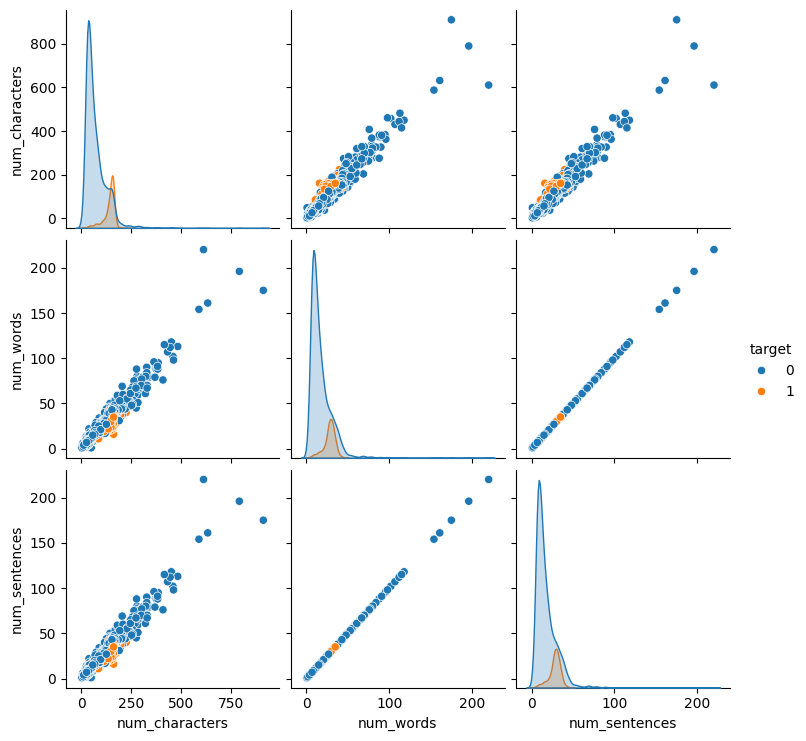

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
df.dtypes

,0
target,int64
text,object
num_characters,int64
num_words,int64
num_sentences,int64


# Data preprocessing:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

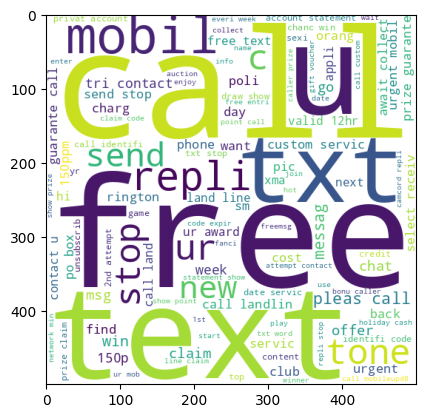

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

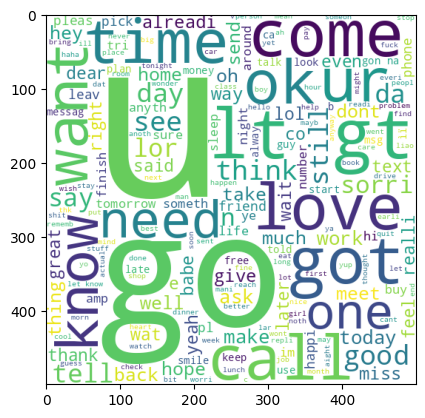

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)



In [ ]:
len(spam_corpus)

9939

# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [ ]:
x=tfidf.fit_transform(df['transformed_text']).toarray()


In [ ]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_train)
print(accuracy_score(y_train,y_pred1))
print(confusion_matrix(y_train,y_pred1))
print(precision_score(y_train,y_pred1))

0.8940749697702539
[[3182  438]
 [   0  515]]
0.540398740818468


In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_train)
print(accuracy_score(y_train,y_pred2))
print(confusion_matrix(y_train,y_pred2))
print(precision_score(y_train,y_pred2))

0.9779927448609431
[[3618    2]
 [  89  426]]
0.9953271028037384


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_train)
print(accuracy_score(y_train,y_pred3))
print(confusion_matrix(y_train,y_pred3))
print(precision_score(y_train,y_pred3))

0.9852478839177751
[[3618    2]
 [  59  456]]
0.9956331877729258


tfidf-->MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}




In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("For",name)
  print("Accuracy-",current_accuracy)
  print("Precision-",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy- 0.9758220502901354
Precision- 0.9747899159663865
For KN
Accuracy- 0.9052224371373307
Precision- 1.0
For NB
Accuracy- 0.9709864603481625
Precision- 1.0
For DT
Accuracy- 0.9303675048355899
Precision- 0.83
For LR
Accuracy- 0.9555125725338491
Precision- 0.96
For RF
Accuracy- 0.9738878143133463
Precision- 0.9826086956521739
For AdaBoost
Accuracy- 0.9216634429400387
Precision- 0.8202247191011236
For BgC
Accuracy- 0.9584139264990329
Precision- 0.8682170542635659
For ETC
Accuracy- 0.9748549323017408
Precision- 0.9745762711864406
For GBDT
Accuracy- 0.9506769825918762
Precision- 0.9306930693069307
For xgb
Accuracy- 0.965183752417795
Precision- 0.9396551724137931


In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
5,RF,0.973888,0.982609
2,NB,0.970986,1.000000
10,xgb,0.965184,0.939655
7,BgC,0.958414,0.868217
4,LR,0.955513,0.960000
9,GBDT,0.950677,0.930693
3,DT,0.930368,0.830000
6,AdaBoost,0.921663,0.820225


In [ ]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,ETC,Accuracy,0.974855
2,RF,Accuracy,0.973888
3,NB,Accuracy,0.970986
4,xgb,Accuracy,0.965184
5,BgC,Accuracy,0.958414
6,LR,Accuracy,0.955513
7,GBDT,Accuracy,0.950677
8,DT,Accuracy,0.930368
9,AdaBoost,Accuracy,0.921663


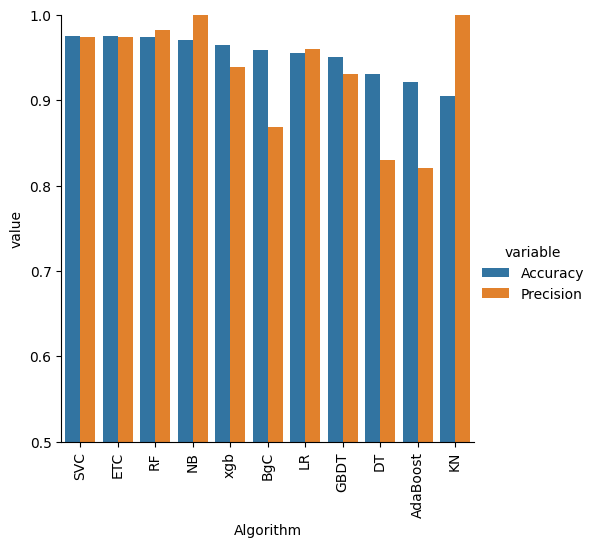

In [ ]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model improve
#1.change the max_features parameter of TfIdf
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_fit_3000':accuracy_scores,'Precision_max_fit_3000':precision_scores}).sort_values('Accuracy_max_fit_3000',ascending=False)

In [ ]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_fit_3000,Precision_max_fit_3000
0,SVC,0.975822,0.974790,0.975822,0.974790
1,ETC,0.974855,0.974576,0.974855,0.974576
2,RF,0.973888,0.982609,0.973888,0.982609
3,NB,0.970986,1.000000,0.970986,1.000000
4,xgb,0.965184,0.939655,0.965184,0.939655
5,BgC,0.958414,0.868217,0.958414,0.868217
6,LR,0.955513,0.960000,0.955513,0.960000
7,GBDT,0.950677,0.930693,0.950677,0.930693
8,DT,0.930368,0.830000,0.930368,0.830000
9,AdaBoost,0.921663,0.820225,0.921663,0.820225


In [ ]:
#voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
bnb=BernoulliNB()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier


In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',bnb),('rf',rfc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', BernoulliNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [ ]:
y_pred=voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9845261121856866
Precision 1.0


In [ ]:
#applying stacking
estimators=[('svm',svc),('nb',bnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.984375


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pickle

input_sms = st.text_input('enter the message')
transformed_sms = transform_text(input_sms)
vector_input = tfidf.transform([transformed_sms])

# Convert the sparse matrix to a dense NumPy array
vector_input_dense = vector_input.toarray()  # This line converts the sparse matrix to a dense array

model = GaussianNB()
model.fit(x, y)  # Make sure 'x' is also a dense array if it was created using tfidf.transform
result = model.predict(vector_input_dense)[0]  # Pass the dense array to predict
if result == 1:
    print('Spam')
else:
    print('NOT Spam')

2025-03-23 13:16:44.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:16:44.721 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:16:44.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:16:44.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:16:44.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:16:44.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Spam


In [ ]:
import streamlit as st
import pickle

input_sms = st.text_input('enter the message')
transformed_sms = transform_text(input_sms)
vector_input = tfidf.transform([transformed_sms])

# Add error handling to check if the file is readable
try:
    with open('model.pkl', 'rb') as file:
        model = pickle.load(file)
    # Fit the model if it's not already fitted
    # Assuming you have x_train and y_train available
    # If not, you'll need to load them or re-create them

    # Only fit if the model isn't fitted


    from sklearn.utils.validation import check_is_fitted
    try:
        check_is_fitted(model)
    except:
        model.fit(x,y)
    # Now you can predict
    result = model.predict(vector_input)[0]
    if result == 1:
        print('Spam')
    else:
        print('NOT Spam')
except EOFError:
    print("Error: 'model.pkl' is empty or corrupted. Please check if it was saved correctly.")

2025-03-23 13:18:16.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:18:16.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:18:16.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:18:16.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:18:16.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 13:18:16.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


NOT Spam


In [ ]:
import streamlit as st
import pickle

input_sms = st.text_input('enter the message')
transformed_sms = transform_text(input_sms)
vector_input = tfidf.transform([transformed_sms])

# Convert the sparse matrix to a dense NumPy array
vector_input_dense = vector_input.toarray()

try:
    with open('model.pkl', 'rb') as file:
        model = pickle.load(file)
    result = model.predict(vector_input_dense)[0]  # Use the dense array
    if result == 1:
        print('Spam')
    else:
        print('NOT Spam')
except EOFError:
    print("Error: 'model.pkl' is empty or corrupted. Please check if it was saved correctly.")

NotFittedError: This BernoulliNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.